<a href="https://colab.research.google.com/github/meiqingli/PAD-6716/blob/main/PAD_6716_Python_Geospatial_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Google Drive
Mount to Google Drive and set working directory so that you have access to the files saved under this account.

In [36]:
import os

if os.path.exists('/content/'):
    from google.colab import drive
    import os
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Introduction to GeoPandas

In this lesson, we'll learn about a package that is core to using geospatial data in Python: GeoPandas. We'll explore the structure of geospatial data (which, turns out, is not too different from DataFrames!), including geometries, shapefiles, and how to save your hard work.

## What is GeoPandas?
`GeoPandas` is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable, allow Python to practioners to more easily and flexibly work with geospatial data in Python, which had been difficult in the past.

If you work with raster data, check out the `rasterio` package. We will not have time to cover it in this class in the interest of time.

### Import Libraries

Let's start by importing the libraries that we will use. If you haven't already, you can install `GeoPandas` within this notebook:

In [37]:
# Install GeoPandas if you don't have it yet
%pip install geopandas

In [38]:
import pandas as pd
import geopandas as gpd

import matplotlib # Base python plotting library
import matplotlib.pyplot as plt # Submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline

### Read in Shapefiles

Let's try is out with the US county boundary files, and use `GeoPandas` for the first time. We can use a flexible function called `gpd.read_file` to read in many different types of geospatial data. When using it, we will specify the `shp` file.

In [39]:
# Read in the counties shapefile
counties = gpd.read_file('PAD_6716 Python Data/tl_2024_us_county/tl_2024_us_county.shp')

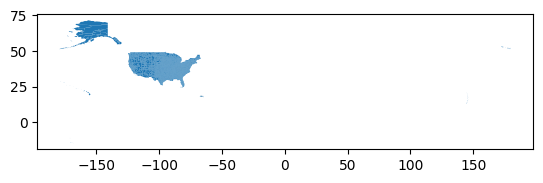

In [40]:
# Plot out US counties
counties.plot();

## Exloring the GeoPandas GeoDataFrame

Before we get in too deep, let's discuss what a GeoDataFrame is and how it's different from a pandas DataFrame.

A [GeoPandas GeoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column. This means all the methods and attributes of a pandas DataFrame also work on a GeoPandas GeoDataFrame.

With that in mind, let's start exploring our dataframe just like we would do in pandas.

In [41]:
# Find the number of rows and columns in countries
counties.shape

(3235, 19)

In [42]:
# Look at the first couple of rows in our geodataframe
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563042,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55525 41.82892, -96.55524 41.827..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980773,61564428,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.2645, -123.72756 46.26..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818941,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269508,22850511,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.5233, -96.69219 40.5231..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645201,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.2737 40.1184, -98.27374 40.1224,..."


In [43]:
# We may check all variables included in our data
counties.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'GEOIDFQ', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [44]:
counties['STATEFP'].unique()

array(['31', '53', '35', '72', '46', '48', '06', '21', '39', '01', '13',
       '55', '05', '41', '42', '28', '29', '08', '37', '49', '40', '51',
       '47', '56', '54', '22', '36', '26', '18', '25', '20', '16', '12',
       '02', '78', '32', '17', '50', '30', '34', '27', '38', '24', '19',
       '45', '23', '15', '33', '04', '10', '11', '66', '69', '60', '44',
       '09'], dtype=object)

In [45]:
counties.STATEFP.unique()

array(['31', '53', '35', '72', '46', '48', '06', '21', '39', '01', '13',
       '55', '05', '41', '42', '28', '29', '08', '37', '49', '40', '51',
       '47', '56', '54', '22', '36', '26', '18', '25', '20', '16', '12',
       '02', '78', '32', '17', '50', '30', '34', '27', '38', '24', '19',
       '45', '23', '15', '33', '04', '10', '11', '66', '69', '60', '44',
       '09'], dtype=object)

You may check the State FIPS codes [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt). The one for Florida is 12. We can make a selection of features in the same way with `pandas`. For example, we can select counties within Florida from the list of counties.

In [46]:
florida_counties = counties.loc[counties['STATEFP'] == '12'].copy().reset_index(drop=True)
florida_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,12,053,00295751,12053,0500000US12053,Hernando,Hernando County,06,H1,G4020,None,45300,45294,A,1224979323,627916623,+28.5559951,-082.5259685,"POLYGON ((-82.25329 28.47849, -82.25329 28.478..."
1,12,129,00306912,12129,0500000US12129,Wakulla,Wakulla County,06,H1,G4020,533,45220,None,A,1570615734,804111188,+30.0913354,-084.3591114,"POLYGON ((-84.1608 29.92127, -84.16104 29.9153..."
2,12,131,00295727,12131,0500000US12131,Walton,Walton County,06,H1,G4020,None,18880,None,A,2689194489,961260714,+30.5712465,-086.1627980,"POLYGON ((-86.39203 30.75066, -86.39185 30.753..."
3,12,127,00306921,12127,0500000US12127,Volusia,Volusia County,06,H1,G4020,422,19660,None,A,2851878125,858117923,+29.0577690,-081.1617920,"POLYGON ((-80.8993 28.79097, -80.89956 28.7909..."
4,12,051,00307626,12051,0500000US12051,Hendry,Hendry County,06,H1,G4020,163,17500,None,A,2993896405,86578552,+26.5399670,-081.1521142,"POLYGON ((-81.56656 26.71338, -81.56653 26.713..."


In [47]:
florida_counties.shape

(67, 19)

We can further filter only the Orange County using similar syntax.



In [48]:
orange_county = florida_counties.loc[florida_counties['NAME'] == 'Orange'].copy().reset_index(drop=True)
orange_county

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,12,095,00295750,12095,0500000US12095,Orange,Orange County,06,H1,G4020,422,36740,None,A,2338842795,260043058,+28.5143906,-081.3232839,"POLYGON ((-81.15781 28.61222, -81.14608 28.612..."


## Save Your Data

Let's not forget to save our new geodataframe. This way we won't need to repeat the processing steps we did above.

We can save it as a shapefile.

In [49]:
florida_counties.to_file("PAD_6716 Python Data/florida_counties.shp")
orange_county.to_file("PAD_6716 Python Data/orange_county.shp")

Alternatively, we can save the file into [GeoJSON](https://geojson.org/) format.

In [50]:
florida_counties.to_file("PAD_6716 Python Data/florida_counties.json", driver='GeoJSON')

You can read these in, just as you would for a shapefile with `gpd.read_file`:

In [51]:
florida_counties_test2 = gpd.read_file("PAD_6716 Python Data/florida_counties.json")

## Plot the GeoDataFrame

We're able to plot our GeoDataFrame because of the extra `geometry` column. What exactly does this column provide?

### GeoPandas Geometries

There are three main types of geometries that can be associated with your GeoDataFrame: points, lines and polygons.

In the GeoDataFrame, these geometries are encoded in a format known as Well-Known Text (WKT) [link text](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry). Consider the following examples:

*   POINT (30 10)
*   LINESTRING (30 10, 10 30, 40 40)
*   POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))

In each case, coordinates are separated by a spaces, and coordinate pairs are separated by commas.

Your geodataframe may also include the variants **multipoints, multilines, and multipolgyons** if the row-level feature of interest is comprised of multiple parts. For example, a GeoDataFrame of states, where one row represents one state, would have a POLYGON geometry for Utah but MULTIPOLYGON for Hawaii, which includes many islands.

Note that, it's OK to mix and match geometries of the same family, e.g., POLYGON and MULTIPOLYGON, in the same GeoDataFrame.

Let's plot the Orange County. We can specify the [color](https://matplotlib.org/stable/gallery/color/named_colors.html) of the shape.

There are also many other formats we could use for data output.

💡 Tip: If you're working with point data (i.e. a single latitude and longitude value per feature), then CSV might be a good option.

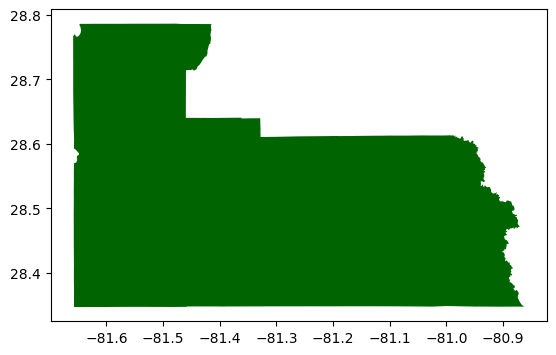

In [52]:
orange_county.plot(color='darkgreen');

# 2. CRS and Map Projections

## Working with CRSs in GeoPandas

### Identifying the CRS of a GeoDataFrame

GeoPandas GeoDataFrames have a `crs` attribute that returns the CRS of the data:

In [53]:
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [54]:
print(counties.crs)

EPSG:4269


### Setting the CRS

You can also set the CRS of a GeoDataFrame using the `crs` attribute. You should set the CRS if is not defined or if you think it is incorrectly defined.

> In desktop GIS terminology, setting the CRS is called **defining the CRS**.

As an example, let's set the CRS of our data to `None`:

In [55]:
# First, set the CRS to None
counties.crs = None

In [56]:
# Check it again
print(counties.crs)

None


In [57]:
counties.crs

💡 Tip: if a variable has a null value (None), then displaying it without printing it won't display anything!

Now, we'll set it back to its correct CRS:

In [58]:
# Set it to 3857
counties.crs = "epsg:3857"
counties.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

💡 Tip: You can set the CRS to anything you like, but that doesn't make it correct! This is because setting the CRS does not change the coordinate data. It just tells the software how to interpret it.

### Transforming or Reprojecting the CRS

You can transform the CRS of a GeoDataFrame with the  to_crs   method.

> In desktop GIS terminology transforming the CRS is called projecting the data (or reprojecting the data).

When you do this, you should save the output to a new GeoDataFrame.

In [59]:
counties_utm10 = counties.to_crs("epsg:26910")


Now, take a look at the new CRS:

In [60]:
counties_utm10.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 126°W and 120°W - onshore and offshore. Canada - British Columbia; Northwest Territories; Yukon. United States (USA) - California; Oregon; Washington.
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

 ### Combined Plots

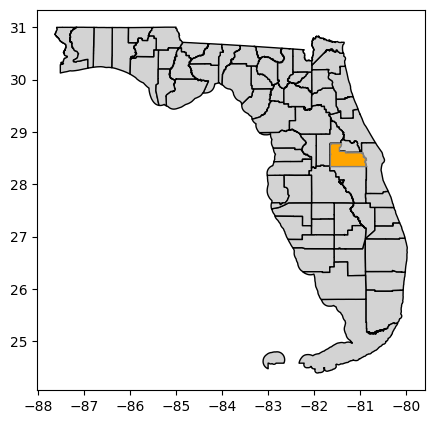

In [61]:
# Plot Orange County and Florida counties together!
fig, ax = plt.subplots(figsize=(5,5))
florida_counties.plot(color='lightgrey', edgecolor='black', ax=ax);
orange_county.plot(color='orange', edgecolor='gray', ax=ax);

# 3. Mapping

## More Data More Maps: Orlando Bike Facilities

Let's overlay more data on the Orange County base map.

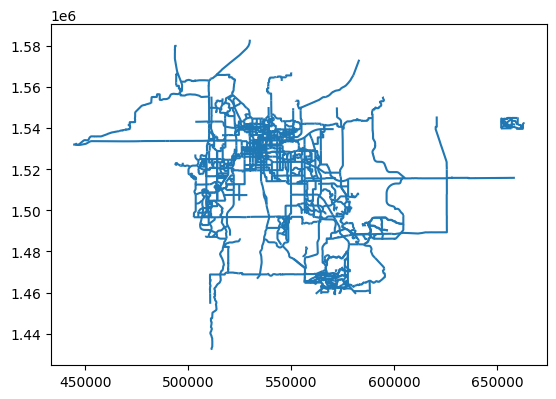

In [62]:
bike_facilities = gpd.read_file('PAD_6716 Python Data/OrlandoBikeFacilities/Orlando_Bike_Facilities.shp')
bike_facilities.plot();

In [63]:
bike_facilities.crs

<Projected CRS: PROJCS["NAD83 / Florida East (ftUS)",GEOGCS["NAD83 ...>
Name: NAD83 / Florida East (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

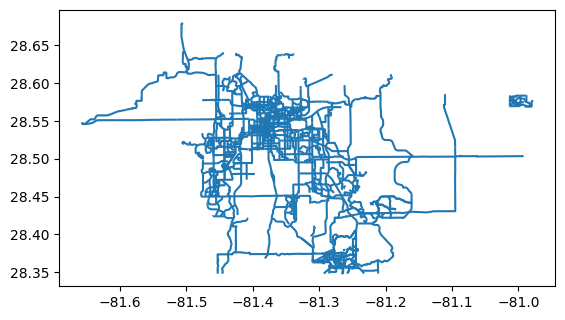

In [64]:
# clip bike data to Orange County
from shapely.geometry import box

bike_facilities_map = bike_facilities.to_crs("epsg:4269")
bike_facilities_orange = bike_facilities_map.clip(orange_county)

bike_facilities_orange.plot();

## More Data More Map: Orange County Schools

Let's map K-12 schools in Orange County.

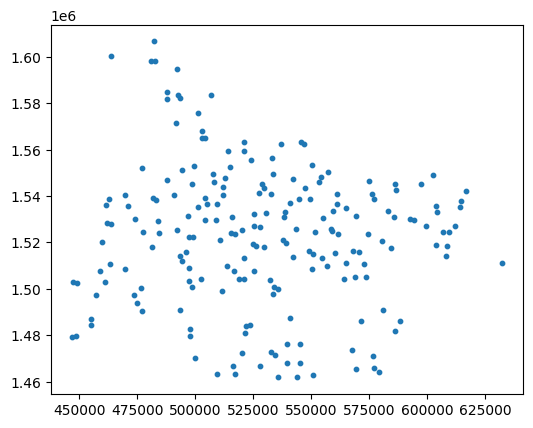

In [65]:
school_orange = gpd.read_file('PAD_6716 Python Data/K-12_School_Locations_2023-24/K-12_School_Locations_2023-24.shp')
school_orange.plot(markersize=10);

## Put Them All Together

Write code to overlay bike facilities and schools with Orange County Boundary.

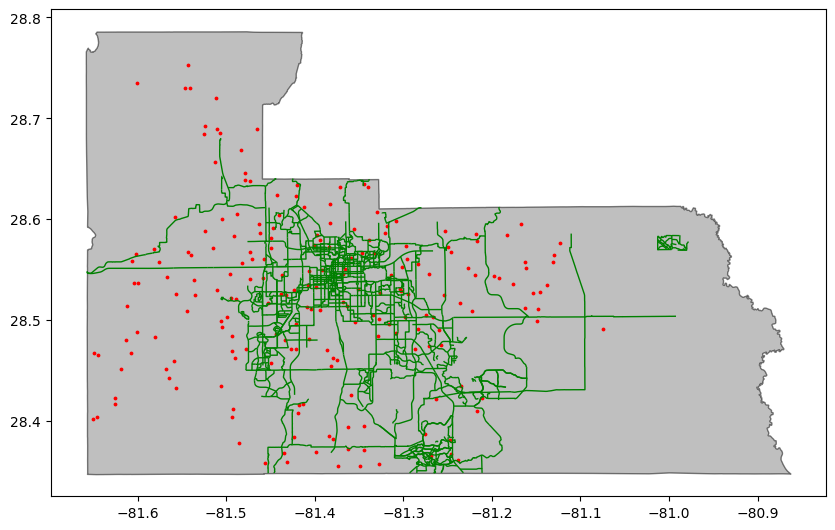

In [66]:
# project layers to the same projection
school_orange_map = school_orange.to_crs("epsg:4269")
bike_facilities_orange_map = bike_facilities_orange.to_crs("epsg:4269")
orange_county_map = orange_county.to_crs("epsg:4269")

fig, ax = plt.subplots(figsize=(10,10))
orange_county.plot(color='gray', edgecolor='black', alpha=0.5, ax=ax)
bike_facilities_orange.plot(color='green', linewidth=1, ax=ax)
school_orange_map.plot(color='red', markersize=3, ax=ax);

# 4. Spatial Analysis

## Spatial Join

A **spatial join**, is the process by which we can leverage the spatial relationships between distinct datasets to merge their information into a new, synthetic dataset. This operation can be thought as the spatial equivalent of an **attribute join**, in which multiple tabular datasets can be merged by aligning matching values in a common column that they both contain. If you've done data wrangling in Python with `pandas`, you've probably performed an attribute join at some point.


In [67]:
%pip install mapclassify

In [68]:
import mapclassify

## Spatial Join

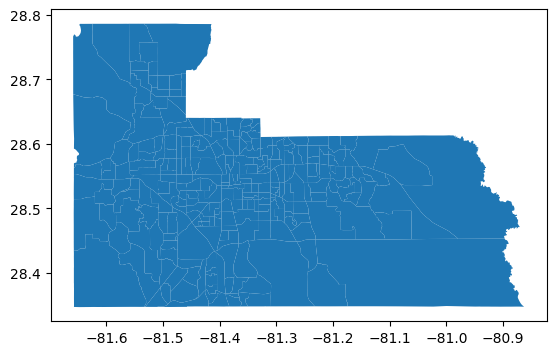

In [71]:
# import Orange County census tract
tract_orange = gpd.read_file('PAD_6716 Python Data/Orange County CensusTract/Orange County CensusTract.shp')
tract_orange.plot()
plt.show()

In [72]:
# convert crs to that of Orange schools
tract_orange = tract_orange.to_crs("epsg:4269")

💡 Tip: Alternatively, we can use the following code to convert crs without having to type out EPSG code.
> `orange_tract = orange_tract.to_crs(school_orange_map.crs)`

In [74]:
# check if the crs' are the same
tract_orange.crs == school_orange_map.crs

True

In [75]:
print(f'Orange school CRS: {school_orange_map.crs}')
print(f'Orange tract CRS: {tract_orange.crs}')

Orange school CRS: epsg:4269
Orange tract CRS: EPSG:4269


In [92]:
tract_orange.shape

(267, 16)

We're ready to combine the datasets in an analysis. In this case, we want to get data from the Census tract within which each school is located. We'll use the spatial join function `gpd.sjoin`.

In [76]:
# take a look at the documentation
help(gpd.sjoin)

Help on function sjoin in module geopandas.tools.sjoin:

sjoin(left_df, right_df, how='inner', predicate='intersects', lsuffix='left', rsuffix='right', distance=None, on_attribute=None, **kwargs)
    Spatial join of two GeoDataFrames.
    
    See the User Guide page :doc:`../../user_guide/mergingdata` for details.
    
    
    Parameters
    ----------
    left_df, right_df : GeoDataFrames
    how : string, default 'inner'
        The type of join:
    
        * 'left': use keys from left_df; retain only left_df geometry column
        * 'right': use keys from right_df; retain only right_df geometry column
        * 'inner': use intersection of keys from both dfs; retain only
          left_df geometry column
    predicate : string, default 'intersects'
        Binary predicate. Valid values are determined by the spatial index used.
        You can check the valid values in left_df or right_df as
        ``left_df.sindex.valid_query_predicates`` or
        ``right_df.sindex.valid_qu

The key arguments to consider are:

* The two GeoDataFrames (`left_df` and `right_df`);
* The type of join to run (`how`), which can take the values `left`, `right`, or `inner`;
* The spatial relationship query to use (`op`).

A couple things to note:

* By default, `sjoin` is an inner join. It keeps the data from both GeoDataFrames only where the locations spatially intersect.
* By default, `sjoin` maintains the geometry of first geodataframe input to the operation.

**🔔 Questions:**
1. Which GeoDataFrame are we joining onto which (i.e. which one is getting the other one's data added to it)?
2. What happened to 'outer' as a join type?
3. Thus, in our operation, which GeoDataFrame should be the `left_df`, which should be the `right_df`, and how do we want our join to run?

In [77]:
schools_jointracts = gpd.sjoin(left_df = school_orange_map,
                               right_df = tract_orange,
                               how ='left')

In [78]:
schools_jointracts.head()

,OBJECTID_1,OBJECTID,SCHL_NUM,NAME_left,FAC_TYPE,SB_DISTRIC,JURISDICTI,YR_LAST_MO,PHONE,PRINCIPAL,...,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,GEOID_Data
0,1,1,259,East Lake,ES,1,Unincorporated,2006,407.658.6825,Elizabeth Bounds,...,Census Tract 165.14,G5020,S,5440599.0,425615.0,+28.6019235,-081.1695091,0.113567,0.000541,14000US12095016514
1,2,2,871,Bonneville,ES,1,Unincorporated,2006,407.249.6290,Natalie Stevens,...,Census Tract 165.13,G5020,S,4989196.0,46922.0,+28.5796634,-081.1886404,0.112402,0.000464,14000US12095016513
2,3,3,911,Union Park,MS,1,Unincorporated,1999,407.249.6309,Isolda Antonio Fisher,...,Census Tract 164.12,G5020,S,4017827.0,104620.0,+28.5841424,-081.2537201,0.085912,0.000380,14000US12095016412
3,4,4,711,Cheney,ES,1,Unincorporated,2006,407.672.3120,Robin Broner,...,Census Tract 164.02,G5020,S,2628794.0,9721.0,+28.5690355,-081.3026020,0.070020,0.000243,14000US12095016402
4,5,5,561,Lakemont,ES,1,Winter Park,2008,407.623.1453,Karl Fox,...,Census Tract 160.02,G5020,S,2130436.0,726657.0,+28.5995463,-081.3333348,0.067990,0.000264,14000US12095016002


In [79]:
schools_jointracts.columns

Index(['OBJECTID_1', 'OBJECTID', 'SCHL_NUM', 'NAME_left', 'FAC_TYPE',
       'SB_DISTRIC', 'JURISDICTI', 'YR_LAST_MO', 'PHONE', 'PRINCIPAL',
       'WEBSITE', 'ADDRESS', 'CITY', 'ZIP', 'LEARN_COMM', 'SCHOOL_TYP', 'Lat',
       'Long_', 'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'GEOID', 'NAME_right', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'GEOID_Data'],
      dtype='object')

**🥊 Confidence Checks:**

As always, we want to perform a confidence check on our intermediate result before we rush ahead.

One way to do that is to introspect the structure of the result object a bit.

1. What type of object should that have given us?
2. What should the dimensions of that object be, and why?
3. If we wanted a visual check of our results (i.e. a plot or map), what could we do?

## Attribute Join

As we saw in the head of that dataset, there are no Census attributes in this dataset.

In order to map the ACS data we need to associate it with the tracts. We will do that by joining the columns from `income.csv` to the columns of `schools_jointracts` using a common column as the key for matching rows. This process is called an attribute join. There are several ways we can go about performing this join.

💡 Tip: You can read more about merging in `geopandas` [here](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html).

In [80]:
income_df = pd.read_csv('PAD_6716 Python Data/income.csv')
income_df.head()

,OBJECTID *,GEOID,B19001e1,B19001e2,B19001e3,B19001e4,B19001e5,B19001e6,B19001e7,B19001e8,B19001e9,B19001e10,B19001e11,B19001e12,B19001e13,B19001e14,B19001e15,B19001e16,B19001e17
0,1,14000US12001000201,1810,651,284,54,100,168,180,144,21,63,19,47,0,0,10,16,53
1,2,14000US12001000202,1538,449,387,331,25,16,52,22,27,15,0,57,104,53,0,0,0
2,3,14000US12001000301,1870,311,54,58,87,109,102,181,405,89,68,69,145,68,0,61,63
3,4,14000US12001000302,1208,96,241,89,39,14,126,127,46,66,39,192,30,58,29,16,0
4,5,14000US12001000400,2370,138,219,159,70,117,23,94,438,37,258,206,396,121,16,34,44


In [81]:
income_df.columns

Index(['OBJECTID *', 'GEOID', 'B19001e1', 'B19001e2', 'B19001e3', 'B19001e4',
       'B19001e5', 'B19001e6', 'B19001e7', 'B19001e8', 'B19001e9', 'B19001e10',
       'B19001e11', 'B19001e12', 'B19001e13', 'B19001e14', 'B19001e15',
       'B19001e16', 'B19001e17'],
      dtype='object')

In [83]:
schools_jointracts.columns

Index(['OBJECTID_1', 'OBJECTID', 'SCHL_NUM', 'NAME_left', 'FAC_TYPE',
       'SB_DISTRIC', 'JURISDICTI', 'YR_LAST_MO', 'PHONE', 'PRINCIPAL',
       'WEBSITE', 'ADDRESS', 'CITY', 'ZIP', 'LEARN_COMM', 'SCHOOL_TYP', 'Lat',
       'Long_', 'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'GEOID', 'NAME_right', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'GEOID_Data'],
      dtype='object')

In [85]:
schools_jointracts['GEOID_Data'].head()

,GEOID_Data
0,14000US12095016514
1,14000US12095016513
2,14000US12095016412
3,14000US12095016402
4,14000US12095016002


Note that they are not named the same thing, but we just need to know that they contain the same information. Also note that they are not in the same order. That's not only okay... that's the point! If they were in the same order already then we could just join them side by side, without having Python find and line up the matching rows from each.

Let's do a `left join` to keep all of the Census tracts in Orange County with schools and only the ACS data for those tracts.

In [86]:
# Left join keeps all tracts and the ACS data for those tracts
schools_jointracts = schools_jointracts.merge(income_df,
                                        left_on='GEOID_Data',
                                        right_on='GEOID',
                                        how='left')
schools_jointracts.head(2)

,OBJECTID_1,OBJECTID,SCHL_NUM,NAME_left,FAC_TYPE,SB_DISTRIC,JURISDICTI,YR_LAST_MO,PHONE,PRINCIPAL,...,B19001e8,B19001e9,B19001e10,B19001e11,B19001e12,B19001e13,B19001e14,B19001e15,B19001e16,B19001e17
0,1,1,259,East Lake,ES,1,Unincorporated,2006,407.658.6825,Elizabeth Bounds,...,122,38,60,95,82,154,311,232,584,211
1,2,2,871,Bonneville,ES,1,Unincorporated,2006,407.249.6290,Natalie Stevens,...,52,60,147,334,159,304,42,36,47,17


In [87]:
schools_jointracts.columns

Index(['OBJECTID_1', 'OBJECTID', 'SCHL_NUM', 'NAME_left', 'FAC_TYPE',
       'SB_DISTRIC', 'JURISDICTI', 'YR_LAST_MO', 'PHONE', 'PRINCIPAL',
       'WEBSITE', 'ADDRESS', 'CITY', 'ZIP', 'LEARN_COMM', 'SCHOOL_TYP', 'Lat',
       'Long_', 'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'GEOID_x', 'NAME_right', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'GEOID_Data', 'OBJECTID *', 'GEOID_y', 'B19001e1', 'B19001e2',
       'B19001e3', 'B19001e4', 'B19001e5', 'B19001e6', 'B19001e7', 'B19001e8',
       'B19001e9', 'B19001e10', 'B19001e11', 'B19001e12', 'B19001e13',
       'B19001e14', 'B19001e15', 'B19001e16', 'B19001e17'],
      dtype='object')

## Aggregation

An **aggregation** is another way we can generate new data from this relationship. In this case, for each feature in one dataset we find all the features in another dataset that satisfy our chosen spatial relationship query with it (e.g. within, intersects), then aggregate them using some summary function (e.g. count, mean).

Let's perform the `groupby` operation.

When aggregating by count, we'll get the counts for every column, which will be the same. So, we'll just select the `GEOID` and `NAME_left` columns at the end.

In [88]:
# number of lower-income households (< $30,000)
schools_jointracts['lower_income'] = schools_jointracts['B19001e2'] + schools_jointracts['B19001e3'] + schools_jointracts['B19001e4'] + schools_jointracts['B19001e5'] + schools_jointracts['B19001e6']
schools_jointracts.head()

,OBJECTID_1,OBJECTID,SCHL_NUM,NAME_left,FAC_TYPE,SB_DISTRIC,JURISDICTI,YR_LAST_MO,PHONE,PRINCIPAL,...,B19001e9,B19001e10,B19001e11,B19001e12,B19001e13,B19001e14,B19001e15,B19001e16,B19001e17,lower_income
0,1,1,259,East Lake,ES,1,Unincorporated,2006,407.658.6825,Elizabeth Bounds,...,38,60,95,82,154,311,232,584,211,373
1,2,2,871,Bonneville,ES,1,Unincorporated,2006,407.249.6290,Natalie Stevens,...,60,147,334,159,304,42,36,47,17,454
2,3,3,911,Union Park,MS,1,Unincorporated,1999,407.249.6309,Isolda Antonio Fisher,...,97,42,146,171,343,166,97,92,47,179
3,4,4,711,Cheney,ES,1,Unincorporated,2006,407.672.3120,Robin Broner,...,18,31,160,122,160,57,16,8,39,215
4,5,5,561,Lakemont,ES,1,Winter Park,2008,407.623.1453,Karl Fox,...,10,10,20,32,26,62,131,62,582,48


In [91]:
schools_countsbytract = schools_jointracts.groupby('GEOID_Data', as_index=False).count()[['GEOID_Data','NAME_left']]
print(f"Counts, rows and columns: {schools_countsbytract.shape}")

# Take a look at the data
schools_countsbytract.head()

Counts, rows and columns: (143, 2)


,GEOID_Data,NAME_left
0,14000US12095010202,2
1,14000US12095010802,1
2,14000US12095011200,1
3,14000US12095011300,2
4,14000US12095011600,3


The above groupby and count operations give us the counts we wanted.

We have 143 (of 267) Census tracts that contain at least one school.
We have the number of schools within each of those tracts.
But, the output of groupby is a plain DataFrame, and not a GeoDataFrame.

If we want a GeoDataFrame, then we have two options:

1. We could join the groupby output to `tract_orange` by the attribute `GEOID`.
2. We could start over, using the GeoDataFrame dissolve method, which we can think of as a spatial groupby.

Since we already know how to do an attribute join, we'll do the dissolve.

First, let's run a new spatial join.

In [93]:
tracts_joinschools = gpd.sjoin(left_df = school_orange_map,
                               right_df = tract_orange,
                               how='right')

In [94]:
tracts_joinschools.head()

,index_left,OBJECTID_1,OBJECTID,SCHL_NUM,NAME_left,FAC_TYPE,SB_DISTRIC,JURISDICTI,YR_LAST_MO,PHONE,...,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,GEOID_Data,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,G5020,S,1730626.0,0.0,+28.5419674,-081.3538326,0.060149,0.000160,14000US12095011000,"POLYGON ((-81.36433 28.54579, -81.36322 28.545..."
1,109.0,110.0,110.0,1421,Ivey Lane,ES,5,Orlando,2000,407.296.6420,...,G5020,S,3930592.0,0.0,+28.5354221,-081.4452781,0.080353,0.000362,14000US12095014601,"POLYGON ((-81.45944 28.53041, -81.4594 28.5315..."
2,75.0,76.0,76.0,861,Rolling Hills,ES,6,Unincorporated,1999,407.296.6530,...,G5020,S,6813997.0,155278.0,+28.5853691,-081.4339188,0.130053,0.000643,14000US12095012403,"POLYGON ((-81.45158 28.58215, -81.45156 28.582..."
2,76.0,77.0,77.0,671,Evans,HS,6,Unincorporated,2011,407.522.3400,...,G5020,S,6813997.0,155278.0,+28.5853691,-081.4339188,0.130053,0.000643,14000US12095012403,"POLYGON ((-81.45158 28.58215, -81.45156 28.582..."
3,64.0,65.0,65.0,461,Zellwood,ES,7,Unincorporated,2012,407.884.2258,...,G5020,S,46816726.0,636108.0,+28.7527935,-081.5848850,0.283931,0.004384,14000US12095017902,"POLYGON ((-81.62464 28.78593, -81.62451 28.785..."


Now, let's run the dissolve.

In [95]:
tracts_schoolcounts = tracts_joinschools[['GEOID_Data', 'NAME_left', 'geometry']].dissolve(by='GEOID_Data', aggfunc='count')
print(f"Counts, rows and columns: {tracts_schoolcounts.shape}")

tracts_schoolcounts.head()

Counts, rows and columns: (267, 2)


,geometry,NAME_left
GEOID_Data,,
14000US12095010201,"POLYGON ((-81.37686 28.55312, -81.37652 28.553...",0
14000US12095010202,"POLYGON ((-81.37255 28.53844, -81.37258 28.538...",2
14000US12095010300,"POLYGON ((-81.38594 28.53106, -81.38583 28.531...",0
14000US12095010400,"POLYGON ((-81.39725 28.5351, -81.3971 28.53509...",0
14000US12095010500,"POLYGON ((-81.39727 28.5356, -81.39727 28.5360...",0


💡 Tip:

The `dissolve` operation requires a geometry column and a grouping column (in our case, `'GEOID'`). Any geometries within the same group will be dissolved if they have the same geometry or nested geometries.

The` aggfunc`, or aggregation function, of the dissolve operation will be applied to all numeric columns in the input geodataframe (unless the function is `count` in which case it will count rows).

Check out the Geopandas documentation on [dissolve](https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html) for more information.

🔔 Question:

1. Above, we selected three columns from the input GeoDataFrame to create a subset as input to the dissolve operation. Why?
2. Why did we run a new spatial join? What would have happened if we had used the schools_jointracts object instead?
3. What explains the dimensions of the new object (267, 2)?

Because our `sjoin` plus `dissolve` pipeline outputs a GeoDataFrame, we can now map the school count by Census tract.

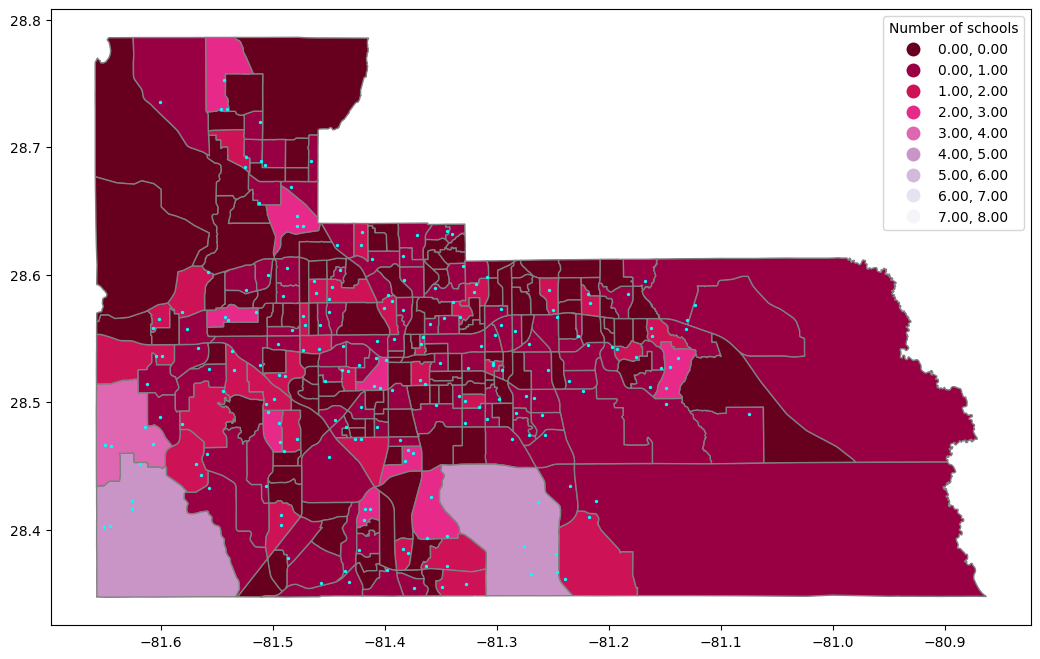

In [96]:
fig, ax = plt.subplots(figsize = (14, 8))

# Display the output of our spatial join
tracts_schoolcounts.plot(ax=ax,
                         column='NAME_left',
                         scheme="user_defined",
                         classification_kwds={'bins': list(range(9))},
                         cmap="PuRd_r",
                         edgecolor="grey",
                         legend=True,
                         legend_kwds={'title': 'Number of schools'})
school_orange_map.plot(ax=ax,
                 color='cyan',
                 markersize=2);

## Interactive Visualization

# 5. API, Vector and Raster Data Sources